<a href="https://colab.research.google.com/github/KilariVasudhaYadav/AI/blob/master/filter_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2020-05-08 04:23:12--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.200.83
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.200.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  47.9MB/s    in 6m 2s   

utime(train2017.zip): No such file or directory
2020-05-08 04:29:15 (50.9 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [0]:
!unzip /content/coco/images/train2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2017/000000229396.jpg  
 extracting: train2017/000000488990.jpg  
 extracting: train2017/000000348684.jpg  
 extracting: train2017/000000234031.jpg  
 extracting: train2017/000000563584.jpg  
 extracting: train2017/000000276069.jpg  
 extracting: train2017/000000401194.jpg  
 extracting: train2017/000000502089.jpg  
 extracting: train2017/000000192183.jpg  
 extracting: train2017/000000425127.jpg  
 extracting: train2017/000000126766.jpg  
 extracting: train2017/000000324161.jpg  
 extracting: train2017/000000452746.jpg  
 extracting: train2017/000000423782.jpg  
 extracting: train2017/000000546343.jpg  
 extracting: train2017/000000249290.jpg  
 extracting: train2017/000000025529.jpg  
 extracting: train2017/000000316928.jpg  
 extracting: train2017/000000337866.jpg  
 extracting: train2017/000000547768.jpg  
 extracting: train2017/000000423162.jpg  
 extracting: train2017/000000224149.jpg  
 extracting: train2017/00

In [0]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2020-05-08 04:37:35--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.85.235
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.85.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  99.7MB/s    in 2.4s    

2020-05-08 04:37:38 (99.7 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [0]:
!unzip /content/coco/annotations/annotations_trainval2017.zip

Archive:  /content/coco/annotations/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [0]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [0]:
dataDir='/content/coco'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [0]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.12s)
creating index...
index created!


In [0]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports furniture appliance indoor kitchen person vehicle animal electronic outdoor food accessory


In [0]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','car','truck']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

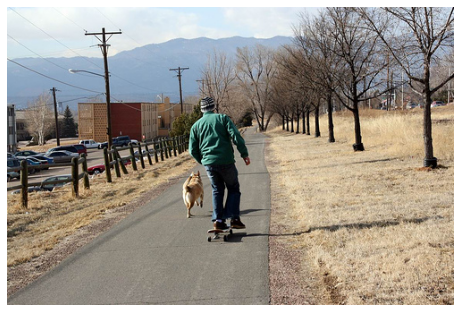

In [0]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

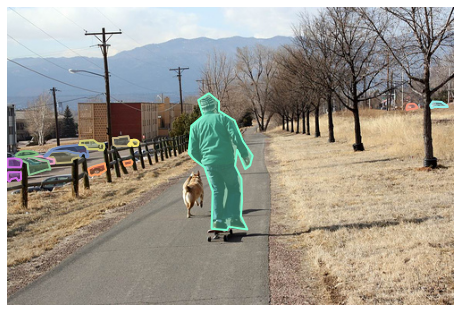

In [0]:

# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [0]:

# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


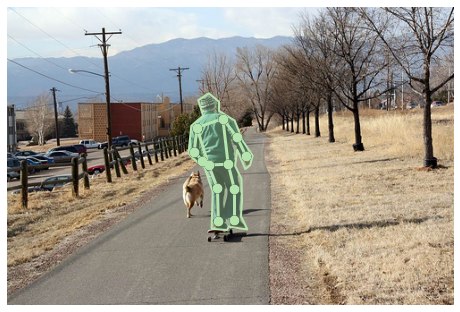

In [0]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [0]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


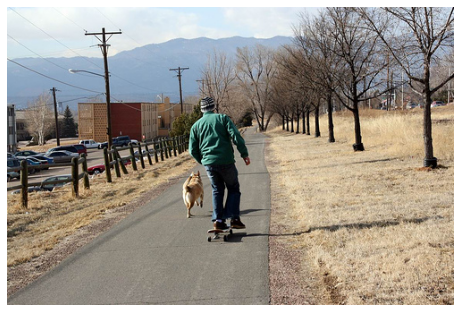

In [0]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [0]:
from pycocotools.coco import COCO
import requests

coco = COCO('/content/coco/annotations/instances_train2017.json')
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds )
images = coco.loadImgs(imgIds)
print("imgIds: ", imgIds)
print("images: ", images)

for im in images:
  print("im: ", im)
  img_data = requests.get(im['coco_url']).content
  with open('downloaded_images/' + im['file_name'], 'wb') as handler:
    handler.write(img_data)



loading annotations into memory...
Done (t=17.24s)
creating index...
index created!
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

imgIds:  [262145, 262146, 524291, 262148, 393223, 393224, 524297, 393227, 131084, 393230, 262161, 131089, 524311, 393241, 524314, 393243, 262171, 131101, 524317, 262175, 524320, 393251, 131108, 524325, 36, 131115, 524333, 262191, 49, 524338, 393267, 393268, 262197, 393271, 26

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
im:  {'license': 5, 'file_name': '000000550642.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000550642.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-24 08:14:38', 'flickr_url': 'http://farm6.staticflickr.com/5110/5724025868_867703fc04_z.jpg', 'id': 550642}
im:  {'license': 3, 'file_name': '000000419571.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000419571.jpg', 'height': 428, 'width': 640, 'date_captured': '2013-11-20 09:13:11', 'flickr_url': 'http://farm4.staticflickr.com/3531/3196434100_59481334d0_z.jpg', 'id': 419571}
im:  {'license': 3, 'file_name': '000000026356.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000026356.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-16 12:23:29', 'flickr_url': 'http://farm7.staticflickr.com/6180/6200444957_98a44f6791_z.jpg', 'id': 26356}
im:  {'license': 3, 'file_name': '000000550645.jpg', 'coco_url': 'http://images.cocoda

In [0]:
import csv

with open('downloaded_annotations' + 'car_bus' + '.csv', mode='w', newline='') as annot:
for im in images:
  annIds = coco.getAnnIds(imgIds=im['id'], catIds=catIds, iscrowd=None)
  anns = coco.loadAnns(annIds)
for i in range(len(anns)):
  annot_writer = csv.writer(annot)
  annot_writer.writerow(['downloaded_images/' + im['file_name'], int(round(anns[i]['bbox'][0])), int(round(anns[i]['bbox'][1])), int(round(anns[i]['bbox'][0] + anns[i]['bbox'][2])), int(round(anns[i]['bbox'][1] + anns[i]['bbox'][3])), 'person'])

In [0]:
from pycocotools.coco import COCO
import sys
import pandas as pd


# Initializations (make them as arguments)
cat_of_interest = "keyboard" # supports only one category.
ann_file = "/media/VjSravani/Sravani/public-datasets/coco/annotations/instances_train2017.json"
csv_save_path = "/media/VjSravani/Sravani/public-datasets/coco/annotations/keyboard-trn-bboxes.csv"

# COCO instance
coco = COCO(ann_file)

# get category id
cat_id  = coco.getCatIds(catNms=[cat_of_interest])

# get annotation ids for current category
ann_ids = coco.getAnnIds(catIds=cat_id, iscrowd=None)
all_ann = coco.loadAnns(ann_ids)
 
# Loop through each annotation and create a data frame with necessary
#     information to create csv file. This file later aids in creating
#     tensorflow record.

df_rows = []
for i in range(0, len(all_ann)):
    cur_ann    = all_ann[i]
    cbbox      = cur_ann["bbox"]
    cimg_info  = coco.loadImgs(cur_ann["image_id"])

    if(len(cimg_info) > 1):
        print("ERROR: More than one image got loaded")
        sys.exit(1)
        
    filename   = cimg_info[0]["file_name"]
    cur_class  = cat_of_interest
    width    = cimg_info[0]["width"]
    height   = cimg_info[0]["height"]
    xmin     = int(cbbox[0])
    ymin     = int(cbbox[1])
    xmax     = min(int(xmin + cbbox[2]), width-1)
    ymax     = min(int(ymin + cbbox[3]), height-1)

    df_rows  = df_rows + [[filename, str(width), str(height), cur_class,
                           str(xmin), str(ymin), str(xmax), str(ymax)]]

df=pd.DataFrame(df_rows, columns=["filename", "width", "height", "class",
                           "xmin", "ymin", "xmax", "ymax"])
df.to_csv(csv_save_path)
